# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [102]:
DATA_FOLDER = '../../02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [103]:
#all imports

import pandas as pd
import os
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  #

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.


## Find the number of new deaths :


Each `csv` is red and transformed in dataframe called `df`.

To obtain the number of new deaths reported in this dataframe, we created a function `find_new_death` which takes as 

`Input`:

 - `df` the dataframe 
 
 - `list_` the list of the previous dataframe
 
 - `country` the country name of the corresponding dataframe
 
`Output`:

 - `df` the dataframe after some transformations
 
 - `new_death` the number of new deaths
 
<br/>
 
 
As for each country the data were reported under different name, we find the number a new deaths in a different way dependending on the country name:
 
- ### Liberia ( `liberia` ):

 We took the number of new deaths as the `Totals` *value* of the `Variable` *Newly reported deaths*.  And we took care that this number was an `int`.
 
- ### Guinea ( `guinea` ):

 We took the number of new deaths as the `Totals` value of the `Variable` *New deaths registered*.  And we took care that this number was an `int`.

 As sometimes the `Variable` name was *New deaths registered today* and not *New deaths registered*. We first renamed the `Variable` name in the same way: *New deaths registered*
 
- ### Sierra Leone ( `sl` ):

 We took the number of new deaths as the sum of the `Totals` value of the `Variable` *death_suspected*, *death_probable*, *death_confirmed*.  And we took care that this number was an `int`.
 
 As for this country it was a cumulative number, we substracted the previous cumulative value of new deaths, (obtained from the the previous data frame saved in `list_` :  `list_[-1]`). For the first dataframe of Sierra Leone we choose to set the value of new death to 24, corresponding to the average value of August 2014. In this way it has no impact in the computation of the daily average per month. 
 
 For the files with `NaN` value of new deaths the function return `new_death`= `NaN` 
 
 
 

In [104]:
def find_new_death(df,list_, country):
    if country=='liberia':
 
        #NEW DEATH 
        new_death=int(df.loc[df['Variable'] == 'Newly reported deaths']['Totals'].values[0])
            
            
    elif country=='guinea':
        
        df['Variable']=df['Variable'].replace(['New deaths registered today'], 'New deaths registered')
            
        #NEW DEATH
        new_death=int(df.loc[df['Variable'] == 'New deaths registered']['Totals'].values[0])
            
            
    elif country=='sl':
           
        #NEW DEATH
        new_death=int((df.loc[df['Variable'] == 'death_suspected']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'death_probable']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'death_confirmed']['Totals'].values)[0])
            
            
        if new_death!=0:

            if list_==[]:

                new_death==24  # average of August 2014 
                    
            else:

                old_df=list_[-1]  # olf_dataframe
                previous_death= int((old_df.loc[old_df['Variable'] == 'death_suspected']['Totals'].values)[0])+int((old_df.loc[old_df['Variable'] == 'death_probable']['Totals'].values)[0])+int((old_df.loc[old_df['Variable'] == 'death_confirmed']['Totals'].values)[0])
            
                new_death-=previous_death 
                    
        else:
            new_death=None
    
    
    return df,new_death



## Find the number of new cases :


Each `csv` is red and transformed in dataframe called `df`.

As for the number of new deaths, to obtain the number of new deaths reported in this dataframe, we created a function `find_new_death` which take as 

`Input`:

 - `df` the dataframe 
 
 - `list_` the list of the previous dataframe
 
 - `country` the country name of the corresponding dataframe
 
`Output`:

 - `df` the dataframe after some transformations
 
 - `new_cases` the number of new cases
 
<br/>
 
 
As for the number of new deaths, we found the number of new deaths in a differerent way for each country:
 
- ### Liberia ( `liberia` ):

 We took the number of new cases as the sum of the `Totals` value of the `Variable` *New Case/s (Suspected)*, *New Case/s (Probable)*, *'New case/s (confirmed)*. And we took care that this number was an `int`.
 
 We noticed that for some file we had as `Totals` value of the `Variable` *New Case/s (Suspected)* the cumulative value corresponding to the `Variable` *Total suspected cases*. So when the `Totals` value of the `Variable` *New Case/s (Suspected)* was greater than 1000 (really unlikely compared to the others data) we set this value to the `Variable` *Total suspected cases*. And we set the ` Totals` value of the `Variable` *New Case/s (Suspected)* to 0. 
 
 Then when `Totals` value of the `Variable` *New Case/s (Suspected)* was equal to 0, we recalculated this value as the difference between the  `Totals` value of the  `Variable` *Total suspected cases* of this dataframe and the one of the previous dataframe ( `previous_df =list_[-1]` ). In this way we obtained the correct value of *New Case/s (Suspected)*  for the dataframe for which we set it to 0 (when *New Case/s (Suspected)* was greater than 1000) but also for the dataframe where this value was missing.
 
 We did the same for *New Case/s (Probable)* and *New case/s (confirmed)*
 

- ### Guinea ( `guinea` ):

 We took the number of new cases as the sum of the `Totals` value of the `Variable` *New cases of suspects*, *New cases of probables*, *New cases of confirmed*.  And we took care that this number was an `int`.


- ### Sierra Leone ( `sl` ):

 We took the number of new deaths as the sum of the `Totals` value of the `Variable` *new_suspected'*, *new_probable*, *new_confirmed*.  And we took care that this number was an `int`.



In [61]:
def find_new_cases(df,list_, country):

    
    if country=='liberia':
            
        #NEW CASES
        
        # if New Case/s (Suspected) >1000 -> reset those Value to 'Total suspected cases'
        # we aplly this also to probable and confirmed case
        if int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])>1000:
                
            ns= int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total suspected cases'][0]]=ns
            df.Totals[df.index[df['Variable'] == 'New Case/s (Suspected)'][0]]=0
                
            np= int((df.loc[df['Variable'] == 'New Case/s (Probable)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total probable cases'][0]]=np
            df.Totals[df.index[df['Variable'] == 'New Case/s (Probable)'][0]]=0
                
            nc= int((df.loc[df['Variable'] == 'New case/s (confirmed)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total confirmed cases'][0]]=nc
            df.Totals[df.index[df['Variable'] == 'New case/s (confirmed)'][0]]=0
             
        if int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])==0:
            old_df=list_[-1]
                
            ts= int((df.loc[df['Variable'] == 'Total suspected cases']['Totals'].values)[0])
            old_ts= int((old_df.loc[old_df['Variable'] == 'Total suspected cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New Case/s (Suspected)'][0]]=ts-old_ts
    
                
            tp= int((df.loc[df['Variable'] == 'Total probable cases']['Totals'].values)[0])
            old_tp= int((old_df.loc[old_df['Variable'] == 'Total probable cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New Case/s (Probable)'][0]]=tp-old_tp
                
            tc= int((df.loc[df['Variable'] == 'Total confirmed cases']['Totals'].values)[0])
            old_tc= int((old_df.loc[old_df['Variable'] == 'Total confirmed cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New case/s (confirmed)'][0]]=tc-old_tc
                
                
            
        new_cases=int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'New Case/s (Probable)']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'New case/s (confirmed)']['Totals'].values)[0])
            
            

    elif country=='guinea':
     
        
        #NEW CASES
        new_cases= int(df.loc[df['Variable'] == 'New cases of suspects']['Totals'].values[0])+int(df.loc[df['Variable'] == 'New cases of probables']['Totals'].values[0])+int(df.loc[df['Variable'] == 'New cases of confirmed']['Totals'].values[0])
            
            
           
    elif country=='sl':
   
        #NEW CASES
        new_cases=int((df.loc[df['Variable'] == 'new_suspected']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'new_probable']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'new_confirmed']['Totals'].values)[0])
        

    
    
    return df,new_cases

## Create a new DataFrame

path to the folder ebola:

In [62]:
path=DATA_FOLDER+'/ebola/'

Read the name of the different folder, and keep those whose ending with data, in a `list` called *country_dir*:

In [63]:
#read the name of different folder, and keep those whose end with data
list_dir=np.copy(os.listdir(path))
country_dir=list_dir[[name.endswith('data') for name in list_dir]]

For each country folder, all the `cvs` files names are read using `glob`, and the corresponding path is saved in `cvsFiles`. Then each `cvs` is red and transformed in a dataframe `df` . We renamed the columns index in the same way : `Variable` (and not `Description` etc...), `Date`, `Totals` ...

Then we computed the number of `new_cases` and `new_death` using the function `find_new_cases` and  `find_new_death`. and if those number were not `NaN` then we created a new dataframe `df_cleaned`, which has for attribute `Date`,`Month`, `newdeaths`, `newdeaths`.

For each country all those new datframes are concatenate in a `country frame`,the daily average per month is computed using the function `DataFrameresample('M').mean()`, and the name of the country is added as an attribute of `country frame`

Finally all the country frame are concatenated to obtain the `country frame`.

In [64]:

#list to store the data-frame of each coutry
final_list=[]

for country_name in country_dir:
    
    #country is the name of the folder without data
    country=country_name.replace('_data', '')
   
    csvFiles = glob.glob( path+country_name+'/' "/*.csv")
    
    
    list_ = []  #list cointaining each dataframe of a folder
    list_cleaned=[]   #list cointaining each new dataframe of a folder

    for files in csvFiles:
        
        df = pd.read_csv(files)

        #to have the same columns name
        df=df.rename(index=str, columns={"Description": "Variable", 
                                         "date": "Date",
                                         "variable": "Variable", 
                                         "National":"Totals"})  
        
        df=df.fillna(0)
        
        df,new_death=find_new_death(df,list_, country)
    
        df,new_cases=find_new_cases(df,list_, country)
           

        if (new_death!=None and new_cases!=None):
            #Create a new DataFrame
            df_cleaned=pd.DataFrame({
                    'Date':pd.to_datetime([df.Date[0]]),
                    'Month': pd.to_datetime([df.Date[0]]).month,
                    'newdeaths': new_death, 
                    'newcases': new_cases })
            
        
            list_.append(df)
            list_cleaned.append(df_cleaned)
            
    
    #create country_frame
    country_frame= pd.concat(list_cleaned)
    
    #Compute the daily average per month
    country_frame=country_frame.set_index(['Date'])
    country_frame.index = pd.to_datetime(country_frame.index)
    country_frame=country_frame.resample('M').mean()
    
    #country name as an attribute
    country_frame['Country']=country
    #country_frame.reset_index()
    
    final_list.append(country_frame)


#Create the final data frame
finalframe=pd.concat(final_list)

finalframe=finalframe.reset_index()
finalframe.drop('Date', axis=1, inplace=True)

### for *each country*, the *daily average per month* of *new cases* and *deaths*: 

In [98]:

finalframe.set_index(['Country','Month'])


newcases  newdeaths
Country Month                      
guinea  8.0    25.800000   3.400000
        9.0    19.625000   3.562500
        10.0   34.000000  15.000000
liberia 6.0     5.714286   2.000000
        7.0    11.909091   4.272727
        8.0    37.222222  23.222222
        9.0    63.833333  36.041667
        10.0   45.560000  28.040000
        11.0   49.333333  13.466667
        12.0   19.888889   0.000000
sl      8.0    27.944444  24.166667
        9.0    43.703704   6.037037
        10.0   70.928571  29.892857
        11.0   83.157895  22.473684
        12.0   51.250000  53.000000


### Plot of the *daily average per month* of *new cases* and *deaths*

<function matplotlib.pyplot.show>

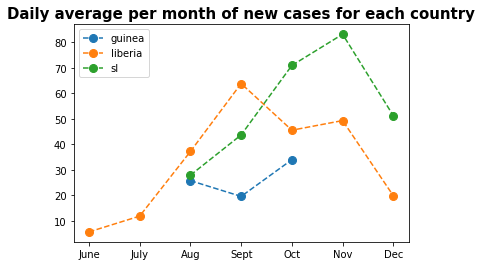

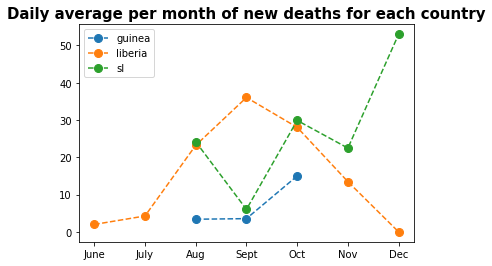

In [101]:
finalframe.Country  = finalframe.Country.astype('category')
groups = finalframe.groupby('Country')

fig, ax1 = plt.subplots()
ax1.margins(0.05)
for name, group in groups:
    ax1.plot(group.Month, group['newcases'], marker='o', linestyle='--', ms=8, label=name)
ax1.legend()
plt.xticks([6,7,8,9,10,11,12],
        ['June','July','Aug','Sept','Oct','Nov','Dec'])

ax1.set_title( 'Daily average per month of new cases for each country', fontsize=15, fontweight='bold')


fig, ax2 = plt.subplots()
ax2.set_title( 'Daily average per month of new deaths for each country', fontsize=15, fontweight='bold')
ax2.margins(0.05)
for name, group in groups:
    ax2.plot(group.Month, group['newdeaths'], marker='o', linestyle='--', ms=8, label=name)
ax2.legend()
plt.xticks([6,7,8,9,10,11,12],
        ['June','July','Aug','Sept','Oct','Nov','Dec'])


plt.show


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [34]:
def merge_xls_files(regex):
    all_data = pd.DataFrame()
    list_ = glob.glob(regex)
    for f in list_:
        df = pd.read_excel(f,names = ["MICROBIOME", "DATA"])
        # added the origin. It will be usefull to add the metadata from the 10th spreadshee
        df['BARCODE']=re.search('MID[1-9]', f).group()
        all_data = all_data.append(df)
    return all_data

We import the 9 MID files

In [35]:
mid = merge_xls_files(DATA_FOLDER+'/microbiome/MID*.xls')
mid.head(10)

ImportError: No module named 'xlrd'

We import the metadata and fill the NaN values with unknown

In [ ]:
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')
metadata = metadata.fillna('unknown')
metadata.head(10)

We merge the 2 datasets on the BARCODE

In [ ]:
df = pd.DataFrame()
df = pd.merge(mid, metadata,on='BARCODE')
df.head(10)

Then we drop the BARCODE colunm because it is not usefull anymore

In [ ]:
df = df.drop('BARCODE', 1)

We pivot the table to have MICROBIOME in index and have the GROUP and SAMPLE in colunm. We also replace all the NaN values by the tag unknown.

In [36]:
df = df.pivot_table('DATA','MICROBIOME',['GROUP','SAMPLE'],fill_value='unnkown')
df.head(10)

KeyError: 'DATA'

Now we check if the index is unique

In [37]:
df.index.is_unique

True

Alright, everithing is great

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [38]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Answer :

* Import the needed libraries and data from titanic.xls using pandas in a data frame called `passengers`

In [39]:
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import pandas as pd
import re

%matplotlib inline

passengers = pd.DataFrame()
passengers = pd.read_excel(DATA_FOLDER + '/titanic.xls')

ImportError: No module named 'xlrd'

* **Describe the type and the value range of each attribute. Indicate and transform the attributes that can be `Categorical`.**

In [40]:
passengers.dtypes

Series([], dtype: object)

In [41]:
passengers.describe()

ValueError: Cannot describe a DataFrame without columns

Based from the observations of the types and value of the attributes of the dataframe `passengers`, we can convert the attibutes  `survived` to a boolean value and `body` to an integer. We need to fill the NaN values first.

In [45]:
passengers.survived = passengers.survived.astype(bool)
passengers.body = passengers.body.fillna("0")
passengers.body = passengers.body.astype(int)

Transform `sex`, `pclass`,`embarked` and `survived` atibutes to `Categorical` attibutes : 

In [46]:
passengers.sex  = passengers.sex.astype('category')
passengers.pclass  = passengers.pclass.astype('category')
passengers.embarked = passengers.embarked.astype('category')
passengers.survived = passengers.survived.astype('category')

* **Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.**

A bar chart is the best way of representing categorical data. Regarding the age of the passengers, we will represent it in a histogram since it gives a discretized display of value frequency which is more suitable to represent non-categorical data.

First, let's define a function to display a bar plot. We will reuse the same function to plot the `travel class`,`embarkation port` and `sex`.

In [47]:
def bar_plot(xlbl, data, n):
    fig, ax = plt.subplots()
    ax.set_title( xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=0)    

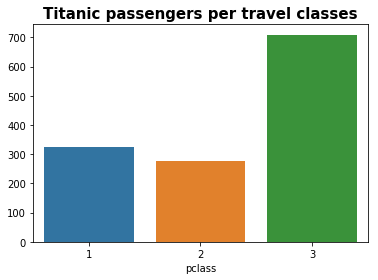

In [48]:
bar_plot('Titanic passengers per travel classes', passengers.groupby('pclass').size(), len(passengers.groupby('pclass')))    

This bar chart tells us that the passengers in class 3 are almost equal to the numbers of passengers travelling in classes 1 and 2 combined.

Now, let's plot a bar chart of the number of passengers having embarked in the diferents ports :

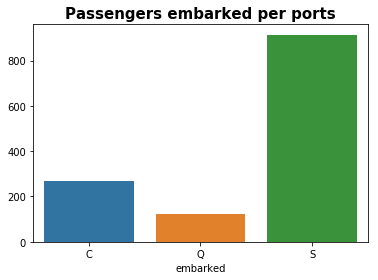

In [49]:
bar_plot('Passengers embarked per ports', passengers.groupby('embarked').size(), len(passengers.groupby('embarked')))    

We can clearly see in this bar char that a large portion of the passengers have embarked from the port of Southhampton.


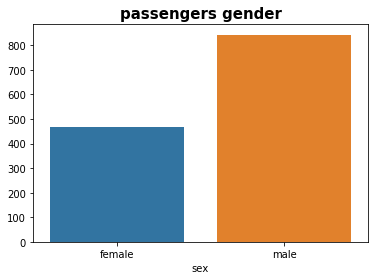

In [50]:
bar_plot('passengers gender', passengers.groupby('sex').size(), len(passengers.groupby('sex')))

The major portion of the passergers of the Titanic where mens. We could see it even more clearer in a stacked bar chart.

/Users/gallo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


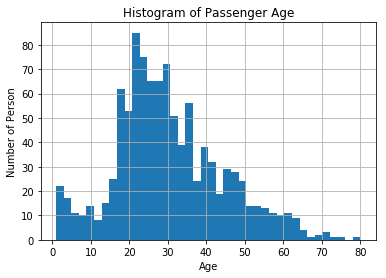

In [51]:
passengers['age'][passengers['age']<1] = None

passengers.age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");
plt.show()

We choose bins=40 because we can see from the describtion of the dataframe that the age max is 80 years old, so the discret intervals will perfectily fit to the edge of the histogram.

This histogram have an almost normal distribution. The earlier statistics show that median is 28 year old, and mean is 30 year old. You can also tell that the distribution is normal when you have similar median and mean.

Overall the plot tells us that the passengers' age is distributed around mid-end 20's.

* **Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.**

In [52]:
def string_to_floor(x):
    x=re.sub('[^a-zA-Z]+', '',x)
    x=x[-1]
    
    floor_list=['A','B','C','D','E','F']
    
    if (x in  floor_list):
        return x
    else:
        return None

In [53]:
passengers.cabin = passengers.cabin.fillna('Unknown')
passengers.floor = passengers.cabin.apply(lambda x : string_to_floor(x))
passengers.floor = passengers.floor.astype('category')

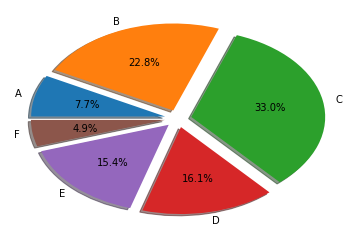

In [54]:
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
labels = passengers.floor.value_counts().sort_index().index.categories

fig1, ax1 = plt.subplots()
ax1.pie(passengers.floor.value_counts().sort_index(), 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, startangle=180,counterclock=False)

plt.show()

* **For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.**

In [55]:
passengers_first = passengers[(passengers['pclass'] == 1)]
passengers_second = passengers[(passengers['pclass'] == 2)]
passengers_third = passengers[(passengers['pclass'] == 3)]

survivors = pd.DataFrame([ passengers_first.survived.value_counts(),
                            passengers_second.survived.value_counts(),
                            passengers_third.survived.value_counts() ], 
                        index=[1,2,3])
survivors.index.names = ['Class']
survivors.columns.names = ['Survived']
survivors

Survived,False,True
Class,,
1,123,200
2,158,119
3,528,181


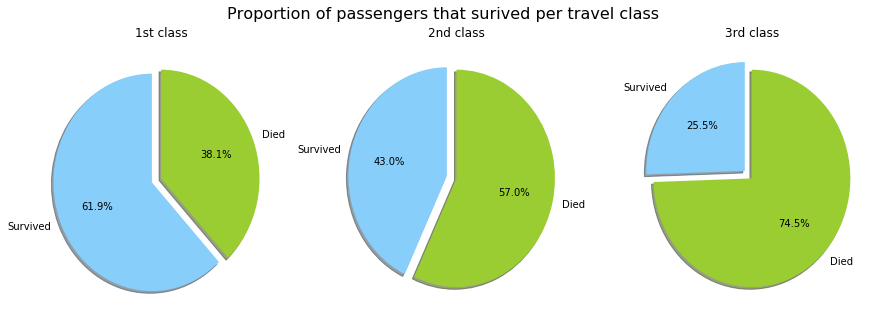

In [56]:
def pie_chart(data, subplot, title):
    ax = subplot
    ax.pie( data, explode = (0, 0.1), shadow = True,
           autopct = '%1.1f%%',
           labels = labels,
           colors = colors,
         startangle=90, counterclock=False)
    plt.title(title)
    
    
fig = plt.figure(figsize=(15,5))
labels = ['Died', 'Survived']
colors = ['yellowgreen', 'lightskyblue']

pie_chart(survivors.loc[1,], plt.subplot(1,3,1), '1st class')
pie_chart(survivors.loc[2,], plt.subplot(1,3,2), '2nd class')
pie_chart(survivors.loc[3,], plt.subplot(1,3,3), '3rd class')

fig.suptitle('Proportion of passengers that surived per travel class', fontsize=16)
plt.show()

* Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

* Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index

In [57]:
median_age=passengers.age.median()

def old_or_young(age,median_age):
    if age <median_age:
        return 0 #'young'
    elif  age >median_age:
        return 1 #'old'
    
    else:
        return None


passengers['age_category']= passengers.age.apply(lambda x : old_or_young(x,median_age))
passengers.age_category  = passengers.age_category.astype('category')

In [58]:
#DataFrame=passengers[['pclass','sex','survived','age_category']]

In [62]:
df=passengers
pd.DataFrame({'Percentage': df.groupby((['survived','age_category'])).size() / len(df)})

Percentage
survived age_category            
False    0.0             0.221543
         1.0             0.231474
True     0.0             0.154316
         1.0             0.158136